<a href="https://colab.research.google.com/github/Niharikaperavali/DataScience/blob/main/Assignment_04(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


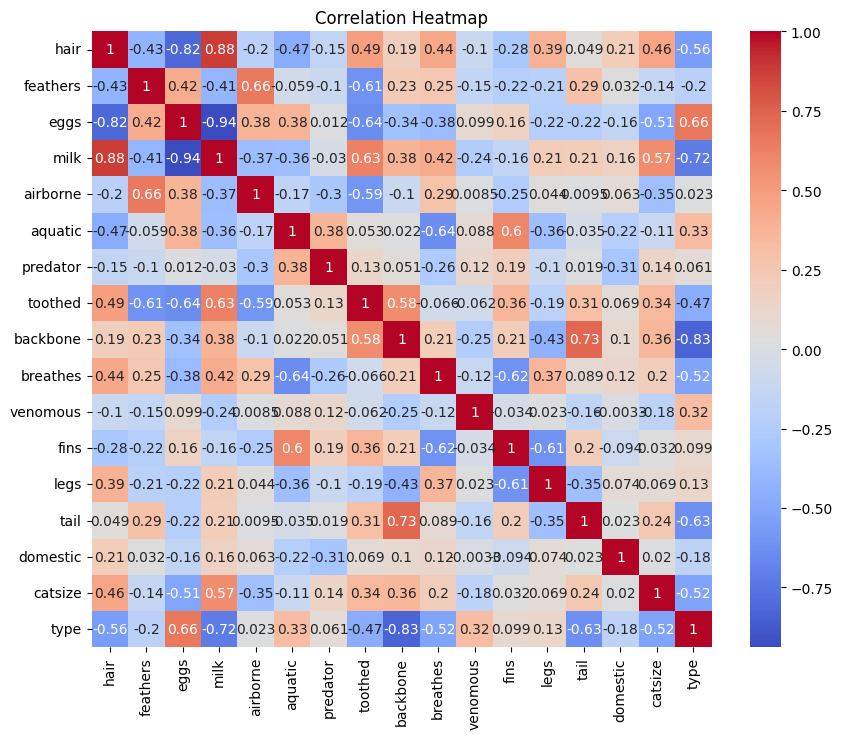

In [7]:
#heat map

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

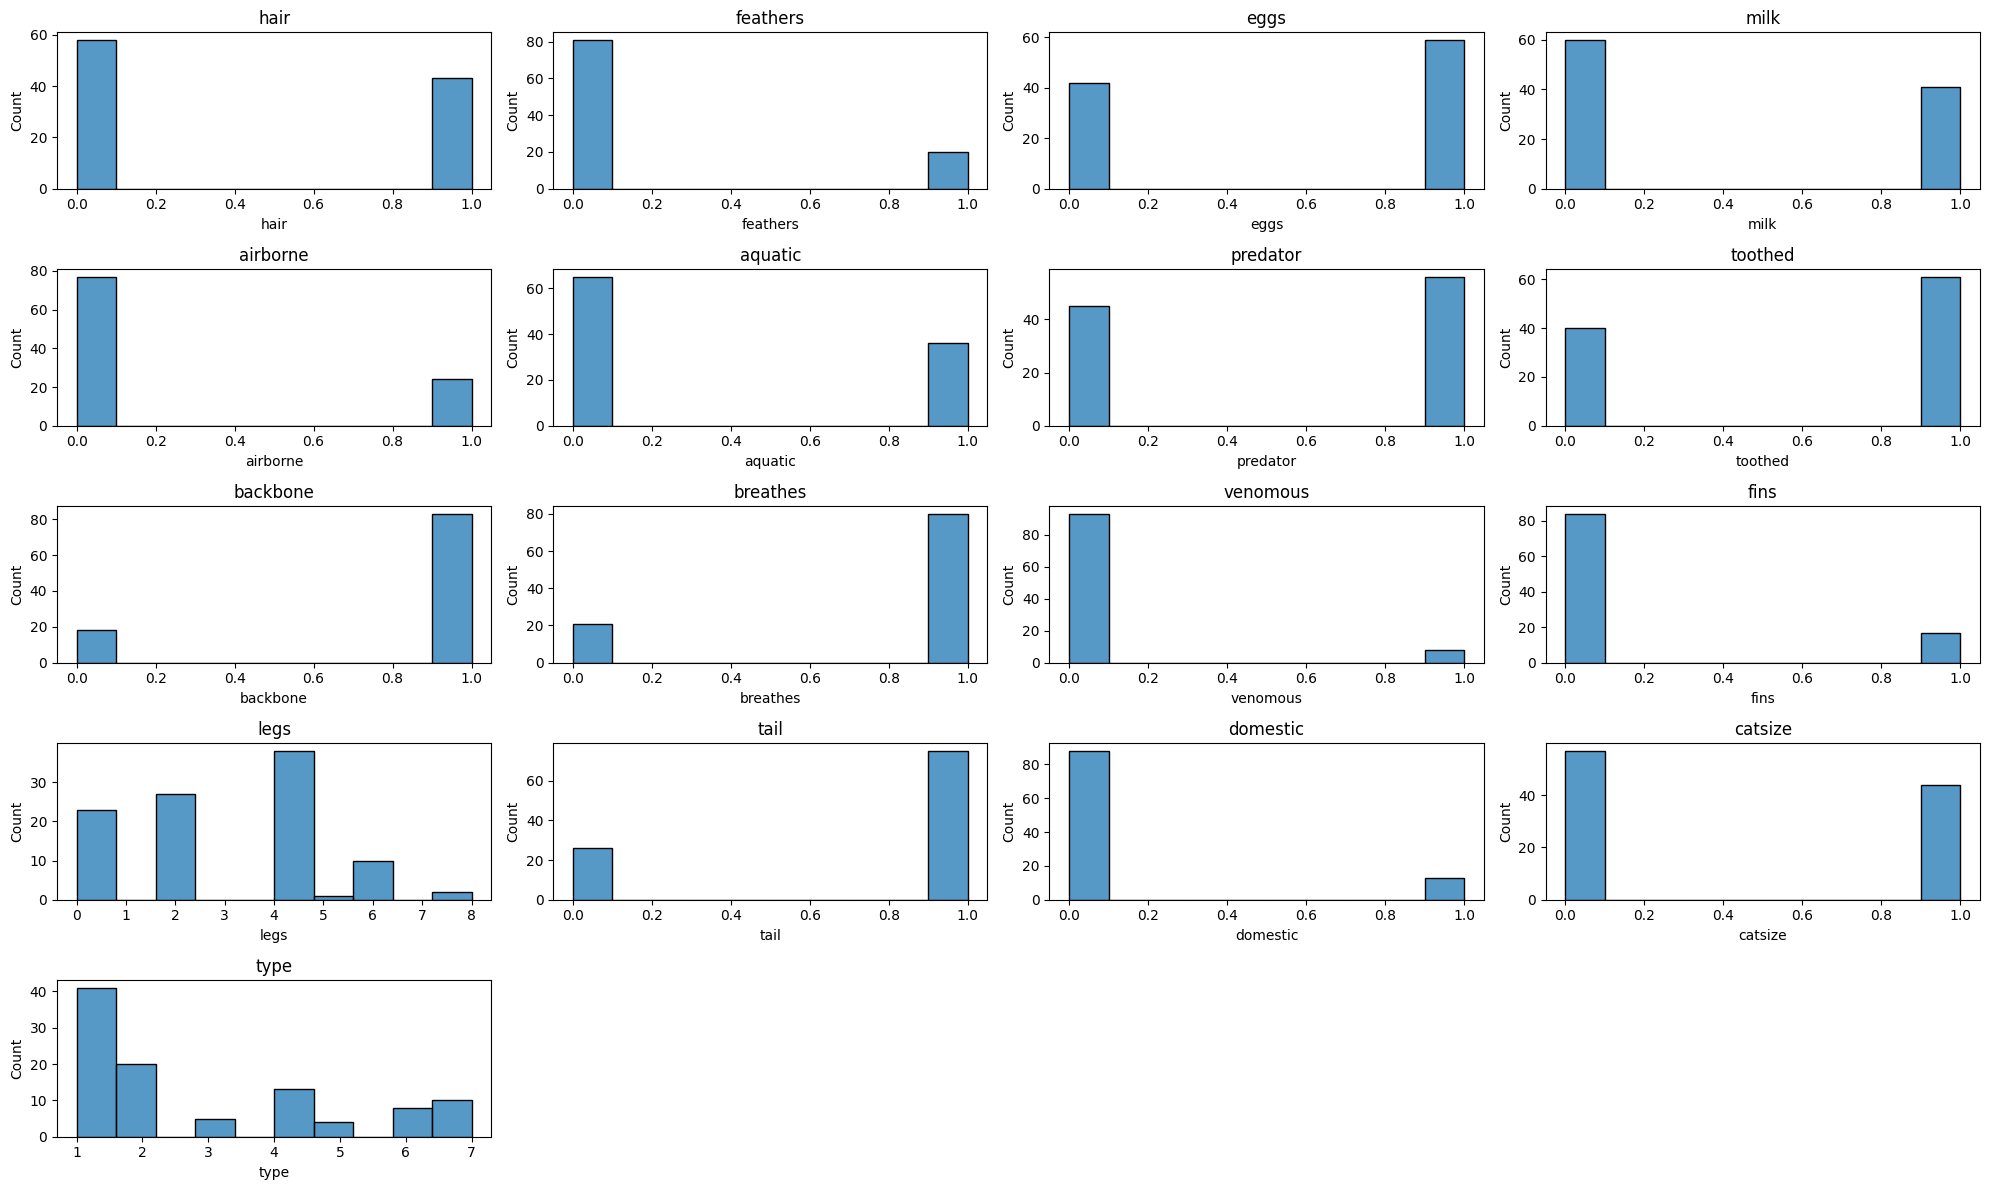

In [8]:
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

# Select all numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include='number').columns

# Set the overall figure size (width=20, height=12 inches)
plt.figure(figsize=(20, 12))

# Loop through each numeric column and plot a histogram
for i, col in enumerate(numeric_cols, 1):
    # Arrange subplots in rows and 4 columns
    plt.subplot((len(numeric_cols) + 3) // 4, 4, i)  # +3 ensures ceiling division
    sns.histplot(df[col], bins=10)  # Plot histogram with 10 bins
    plt.title(col)  # Set title as column name

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display all plots
plt.show()




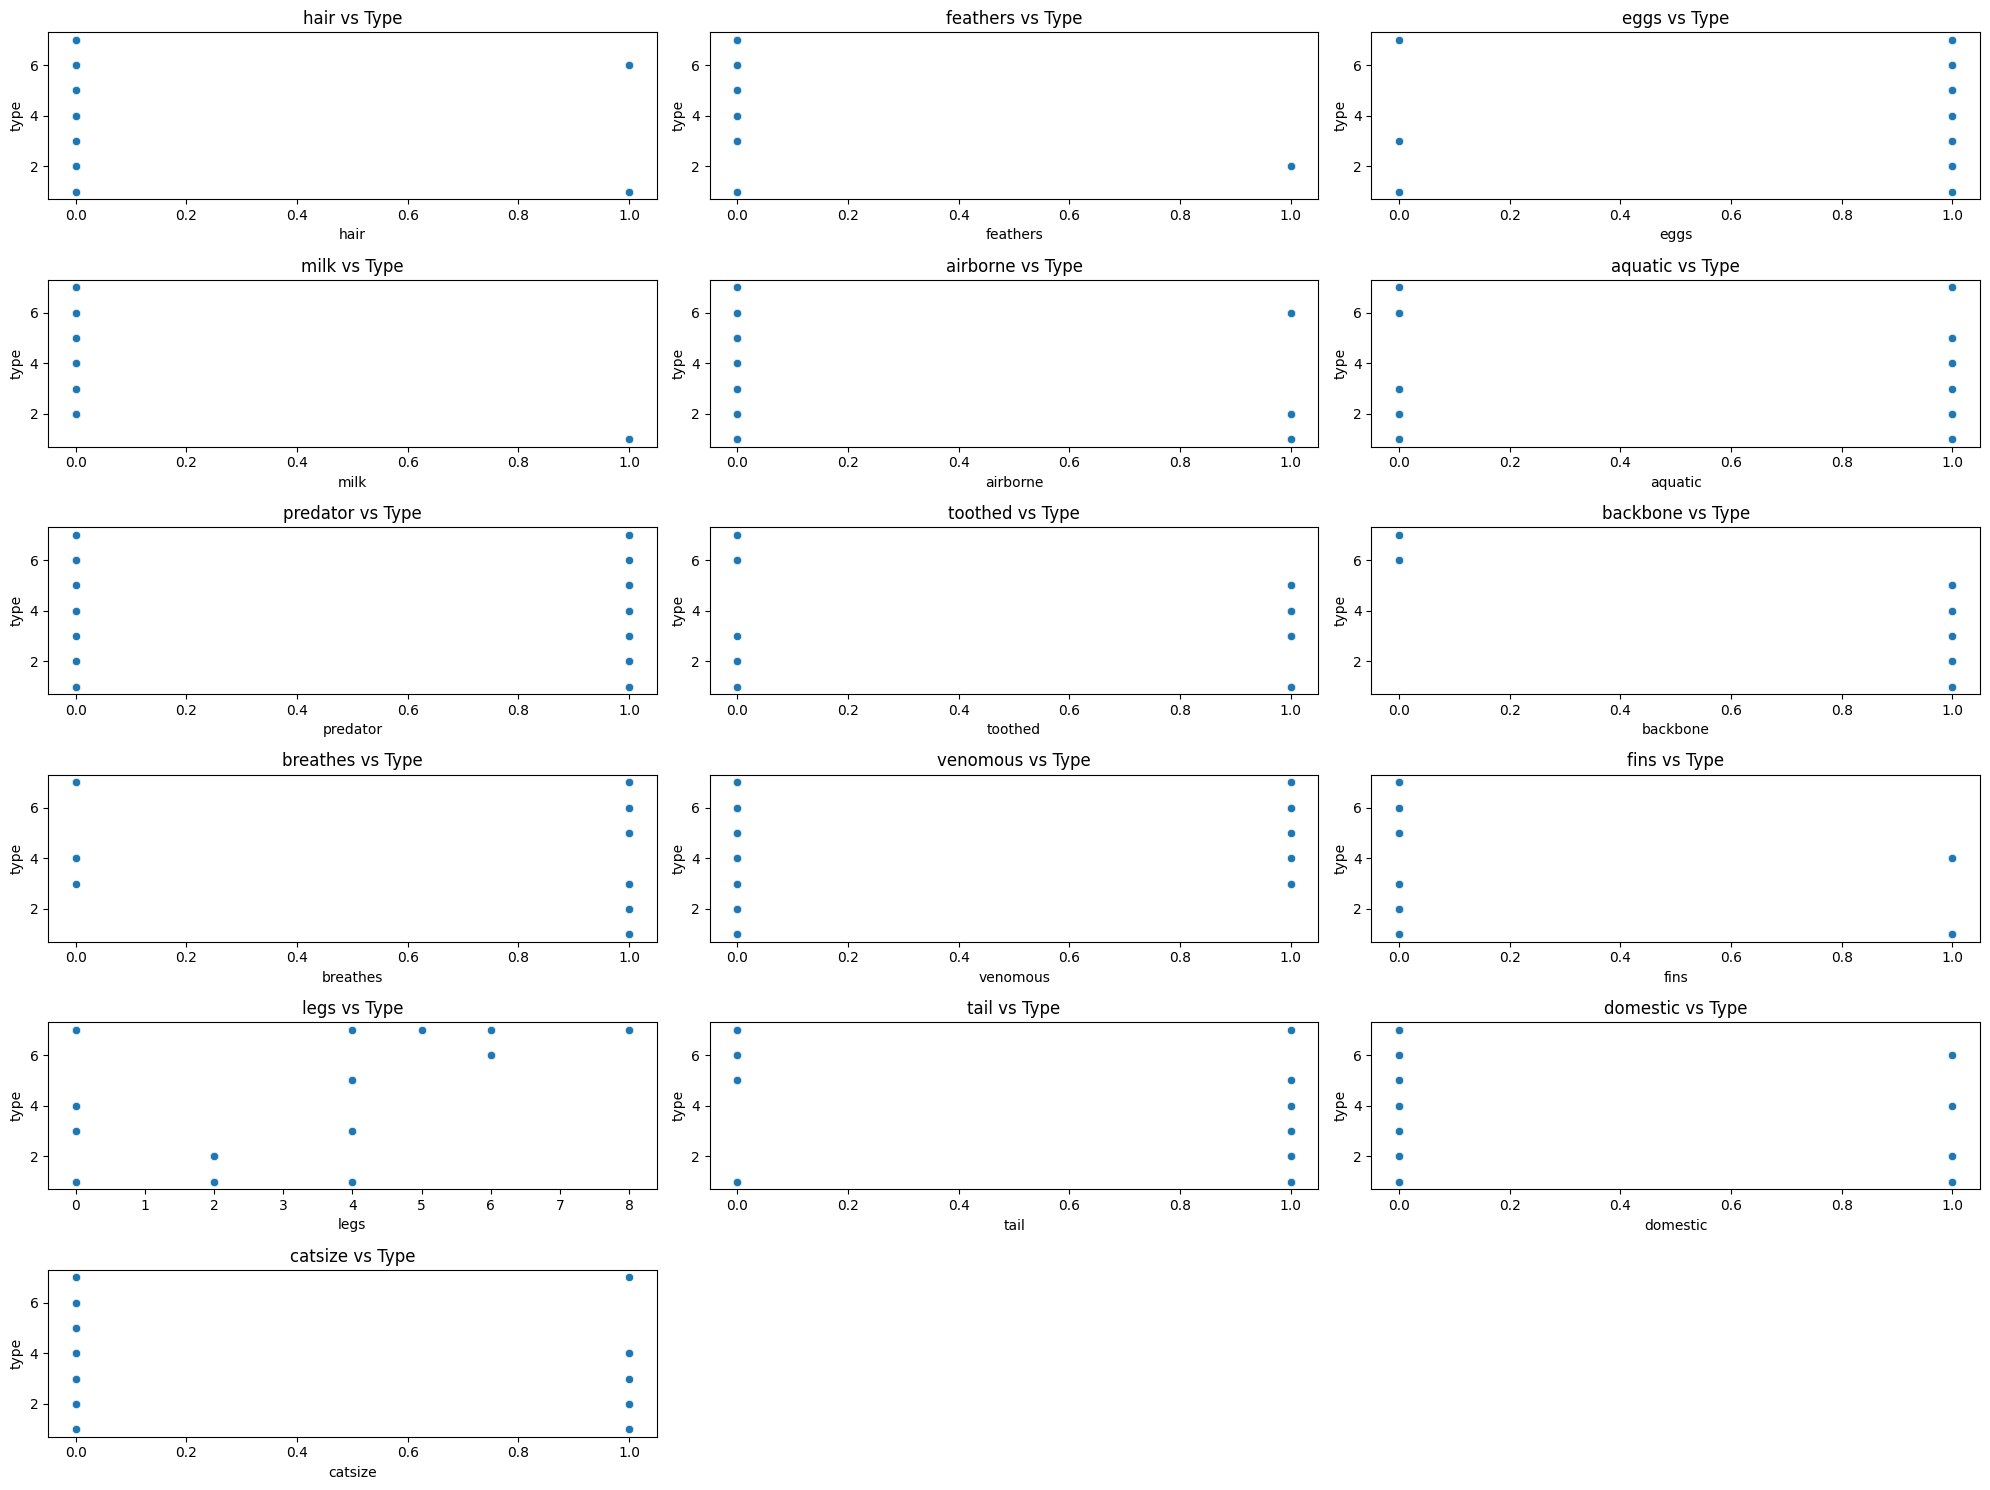

In [9]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Get all numeric columns except 'type' (since 'type' will be on the y-axis)
cols = [col for col in df.select_dtypes(include='number').columns if col != 'type']

# Set the overall figure size
plt.figure(figsize=(20, 15))

# Loop through each numeric column and plot against 'type'
for i, col in enumerate(cols, 1):
    # Create a subplot grid with 3 columns and enough rows to fit all features
    plt.subplot((len(cols) + 2) // 3, 3, i)

    # Create a scatter plot for each feature vs 'type'
    sns.scatterplot(x=col, y='type', data=df)

    # Add title for each plot
    plt.title(f"{col} vs Type")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show all the plots
plt.show()


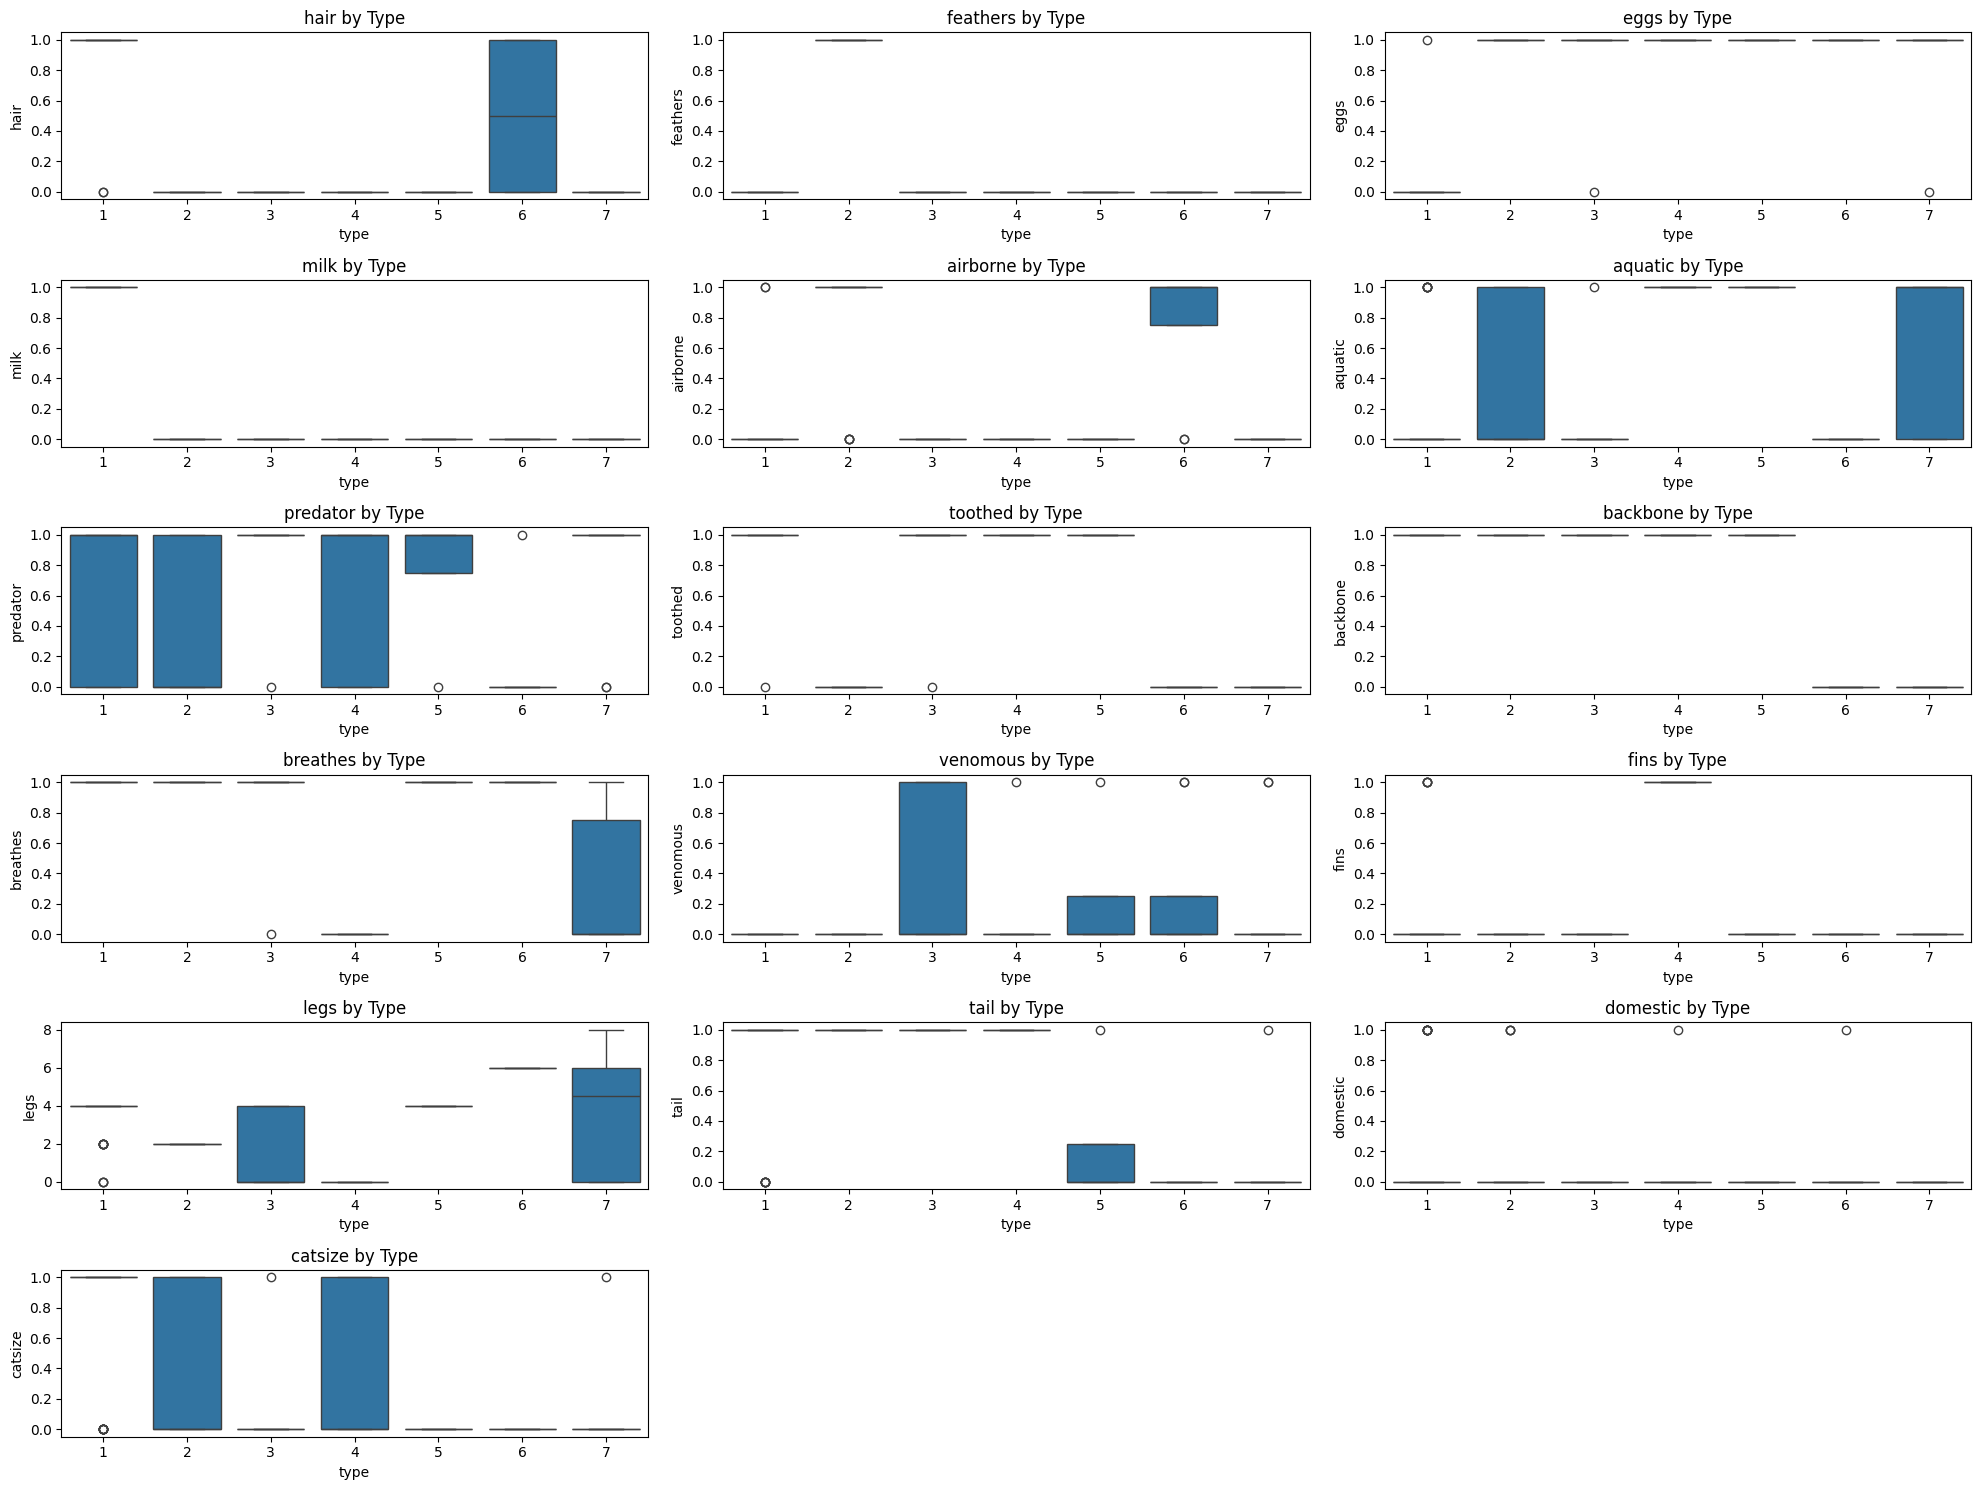

In [10]:

# boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Get all numeric columns except 'type'
cols = [col for col in df.select_dtypes(include='number').columns if col != 'type']

# Set overall figure size
plt.figure(figsize=(20, 15))

# Loop through each numeric column
for i, col in enumerate(cols, 1):
    # Create a grid of subplots (3 per row)
    plt.subplot((len(cols) + 2) // 3, 3, i)

    # Plot boxplot of the feature vs type
    sns.boxplot(x='type', y=col, data=df)
    plt.title(f"{col} by Type")  # Add title

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()





In [11]:
from sklearn.model_selection import train_test_split

# Features = all columns except 'type'
X = df.drop('type', axis=1)

# Target = 'type' column
y = df['type']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy     : 0.9524
Precision    : 0.9206
Recall       : 0.9524
F1-Score     : 0.9333

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



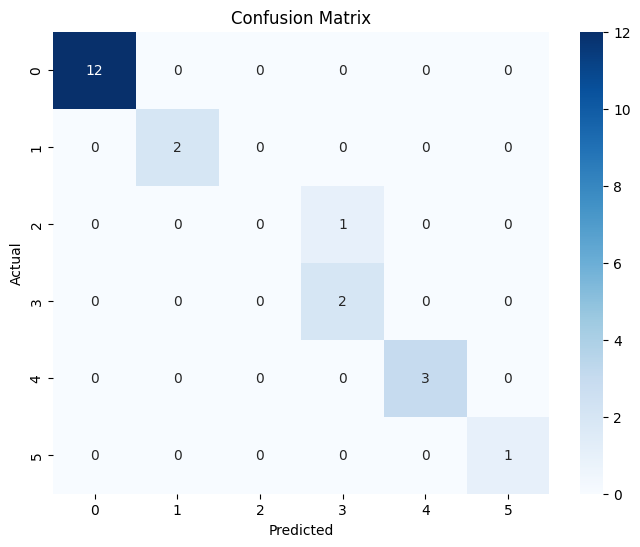

In [12]:
# Step 1: Drop non-numeric column and select features/target
X = df.drop(['type', 'animal name'], axis=1)
y = df['type']

# Step 2: Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train KNN and evaluate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Step 4: Evaluation
print("Accuracy     :", round(accuracy_score(y_test, y_pred), 4))
print("Precision    :", round(precision_score(y_test, y_pred, average='weighted', zero_division=0), 4))
print("Recall       :", round(recall_score(y_test, y_pred, average='weighted', zero_division=0), 4))
print("F1-Score     :", round(f1_score(y_test, y_pred, average='weighted', zero_division=0), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

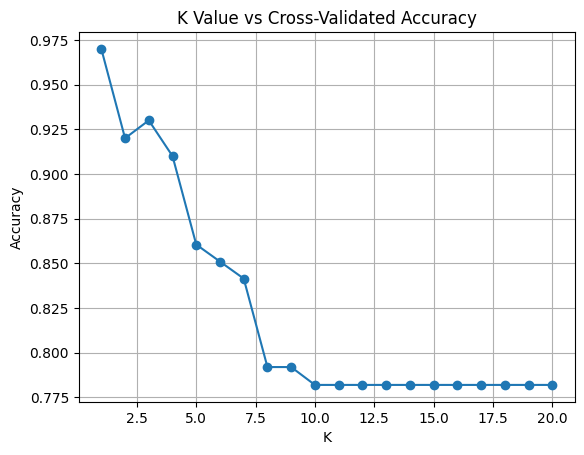

Best K: 1, Accuracy: 0.9700


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

X = df.drop(['type', 'animal name'], axis=1)
y = df['type']

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Plotting K vs Accuracy
plt.plot(k_range, scores, marker='o')
plt.title('K Value vs Cross-Validated Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print best K
best_k = k_range[scores.index(max(scores))]
print(f"Best K: {best_k}, Accuracy: {max(scores):.4f}")
